In [ ]:
#firstly we import the libraries that would be used for our data analysis

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

S_P= pd.read_csv("..\StudentsPerformance.csv") 

In [ ]:
#gives a short overview of the heading of our csv file.
S_P.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
#this shows the data type of our data and the no of datapoints.
S_P.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#this tells us the shape of our data.
print (S_P.shape)

(1000, 8)


These shows that:
1. There are 1000 rows and 8 columns in our dataset, with the column names shown in the info.
2. There are 5 features in our dataset also the categorical variables of the dataset and they include: gender, race/ethnicity, parental level of education, lunch, and test preparation course.
3. The class labels are 3 and are also the numerical variables. They include; math score, reading score and writing score.

## Objective
The objective is to check the effects of the various factors such as gender, race/ethnicity, parental level of education, lunch and test prepartion score on the performance of the students in a test. 

In [ ]:
#to check the descriptive statistics  such as; count, mean, standard deviation, minimum value, maximum value 
#and the quartiles of the numerical variables

S_P.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [ ]:
#this shows if the data has any missing value
S_P.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
#this shows the no of categorical values in our features.

S_P.select_dtypes('object').nunique()

gender                         2
race/ethnicity                 5
parental level of education    6
lunch                          2
test preparation course        2
dtype: int64

From above, we see there are no missing values in our dataset and also the number of categorical values in the categorical varibles.

We will add two new feature(column) called 'Overall Grade' and Grade Percentage, this would show the sum of scores obtained in maths, writing and reading by each student. The grading criteria is shown below as 
1. 70-100= A-Class
2. 60-69= B-Class
3. 50-59=C-Class
4. 40-49= D-Class
5. 0-39= F-Class


In [ ]:
#Creating new features and function to grade the scores

S_P['Grade Percentage']=(S_P['math score']+S_P['reading score']+S_P['writing score'])/300*100

def determine_grade(scores):
    'This function determines grades based on students scores'
    if scores >= 70 and scores <= 100:
        return 'A-Class'      
    elif scores >=60  and scores < 70:
        return 'B-Class'
    elif scores >= 50 and scores < 60:
        return 'C-Class' 
    elif scores >= 40 and scores < 50:
        return 'D-Class'
    elif scores >= 0 and scores < 40:
        return 'F-Class'

S_P['Overall Grade']=S_P['Grade Percentage'].apply(determine_grade)

S_P.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grade Percentage,Overall Grade
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667,A-Class
1,female,group C,some college,standard,completed,69,90,88,82.333333,A-Class
2,female,group B,master's degree,standard,none,90,95,93,92.666667,A-Class
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333,D-Class
4,male,group C,some college,standard,none,76,78,75,76.333333,A-Class


In [ ]:
#this shows the number of students and the scores in the various Grade level.


S_P['Overall Grade'].value_counts()

A-Class    459
B-Class    256
C-Class    182
D-Class     73
F-Class     30
Name: Overall Grade, dtype: int64

This shows that 459, 256, 182 total students had A,B and C class respectively, which is above average while 73 students had average grade scores but 30 students failed overall.

The pie plot below helps to better visualize the output of our value count of the Overall Grades.

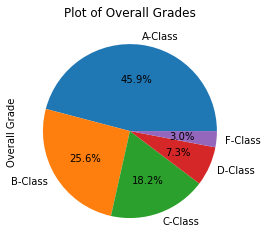

In [ ]:
#this codes help to plot a pie plot to show the overall grades
S_P['Overall Grade'].value_counts().plot.pie(autopct="%1.1f%%")
plt.title('Plot of Overall Grades')
plt.show()

OBSERVATION
This plot depicts that more of the students had A-Class and B-Class. While the percentage of those that failed is very low.

From our data description, we observe two class labels under gender, which are female and male. We would explore how the gender of a student affects performance and if one gender has a better performance than the other.


In [ ]:
#this shows the number of female students and that of male students.

S_P['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

Of the 1000 students, there are 518 female while 482 are male. which gives a difference of less than 40. Thus, we can rightly assume that theres a uniformity in this distribution.

The plots below help to compare how well the gender performed against the other in the different variables maths score, reading score, writing score and also that of overall grades.

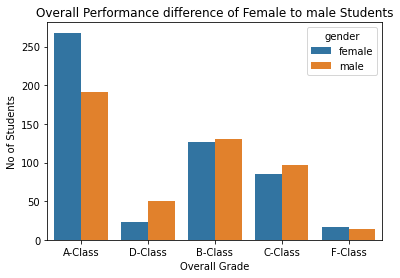

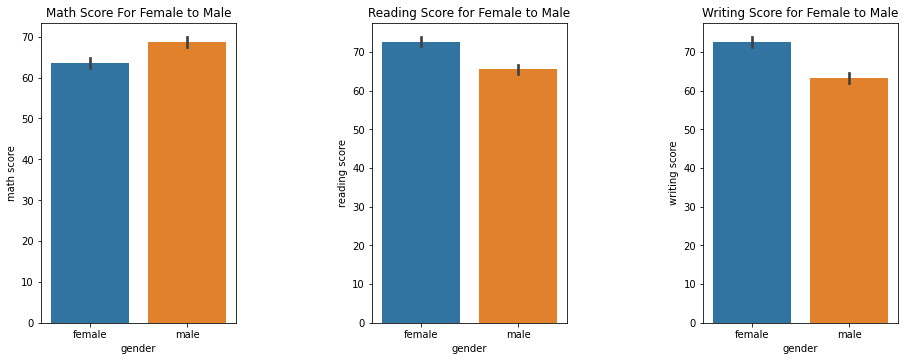

In [ ]:
#this plot shows how well students performed in overall grades based on their gender
sns.countplot(S_P['Overall Grade'],hue = S_P['gender'])
plt.ylabel('No of Students')
plt.title('Overall Performance difference of Female to male Students')

#this plot shows the different performance in math score, reading score and writing score based on their gender.
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.145, bottom=0.2, right=1.2, top=1.2,
                      wspace=0.7, hspace=0.4)


plt.subplot(251)
plt.title('Math Score For Female to Male')
sns.barplot(x= S_P['gender'], y= S_P['math score'])
plt.subplot(252)
plt.title('Reading Score for Female to Male')
sns.barplot(x=S_P['gender'], y=S_P['reading score'])

plt.subplot(253)
plt.title('Writing Score for Female to Male')
sns.barplot(x=S_P['gender'], y=S_P['writing score'])

plt.show()

OBSERVATIONS

1. More female students had grade A than male with an higher percentage. While most male students had average grades. Overall Female students performed better with scores above average.
2. Male gender seems to thrive better in maths than the females while the Female students excel greatly in reading and writing.
3. Its therefore safe to assume that the gender has an effect on the performance of a student.

Below, we check to see if the race/ethnicity have an effect on student performance.

In [ ]:
#this shows the number of student that belongs to each race/ethnicity group
S_P['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

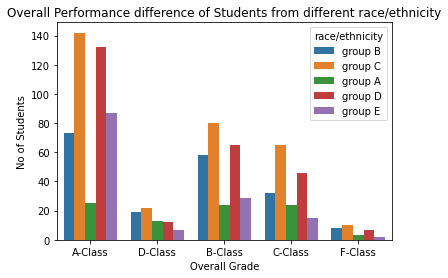

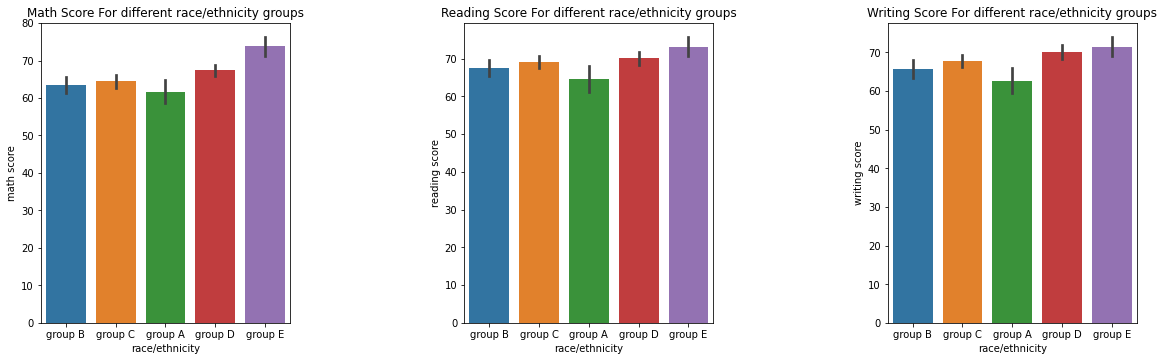

In [ ]:
#plot to check the overall performance score of students from different ethnicity/race

sns.countplot(S_P['Overall Grade'],hue = S_P['race/ethnicity'])
plt.ylabel('No of Students')
plt.title('Overall Performance difference of Students from different race/ethnicity')

#plot to check the effect of race/ethnicity on the different scores of students
plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.145, bottom=0.2, right=1.2, top=1.2,
                      wspace=0.7, hspace=0.4)


plt.subplot(245)
plt.title('Math Score For different race/ethnicity groups')
sns.barplot(x= S_P['race/ethnicity'], y= S_P['math score'])
plt.subplot(246)
plt.title('Reading Score For different race/ethnicity groups')
sns.barplot(x=S_P['race/ethnicity'], y=S_P['reading score'])

plt.subplot(247)
plt.title('Writing Score For different race/ethnicity groups')
sns.barplot(x=S_P['race/ethnicity'], y=S_P['writing score'])

plt.show()

OBSERVATIONS
1. Students from ethnicity group C seem to be higher performers with grade band of A-Class in overall score while those from ethnicity group A are average in all grade class.
2. In each score group(maths,reading and writing) we can see that students from ethnicity group E are high performers.
3. Because of the high difference margin in number of students from varying ethnicity groups, we cannot know for sure if the race/ethnicity has an effect on the performance of a student.

Next, we check if the parental level of education has an effect on the performance of students.

In [ ]:
#this shows the number of student having parents with various education level

S_P['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

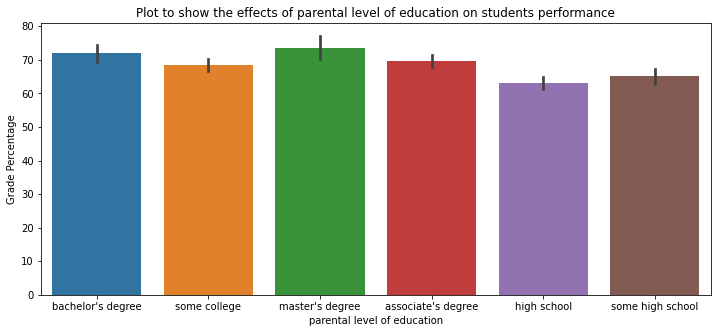

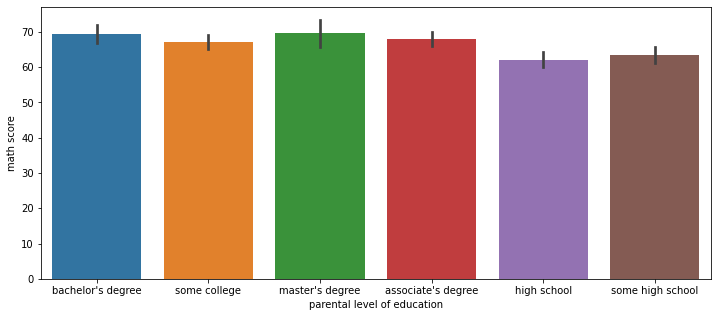

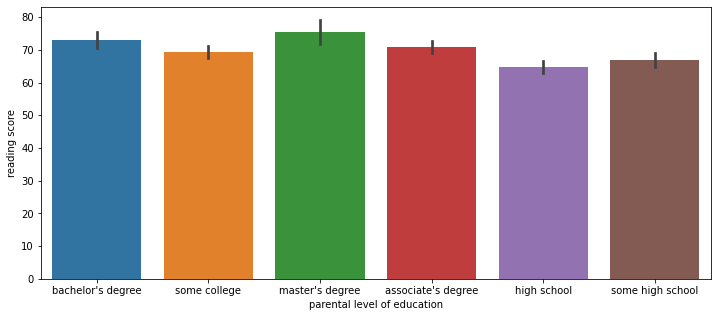

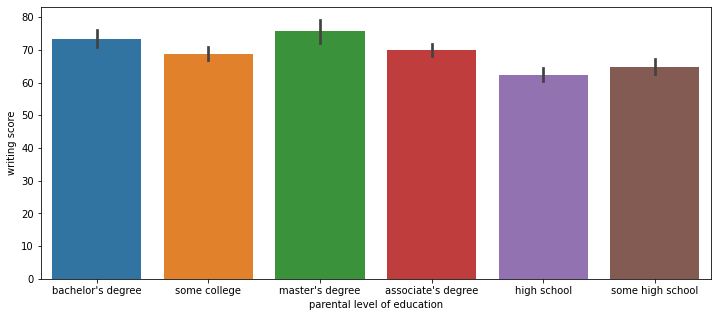

In [ ]:
#plot to check the effects of the various educational level of parents on students overall performance 

plt.figure(figsize=(12,5))
plt.title("Plot to show the effects of parental level of education on students performance")
sns.barplot(x=S_P['parental level of education'],y=S_P['Grade Percentage'])
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(x=S_P['parental level of education'],y=S_P['math score'])
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(x=S_P['parental level of education'],y=S_P['reading score'])
plt.show()
plt.figure(figsize=(12,5))
sns.barplot(x=S_P['parental level of education'],y=S_P['writing score'])
plt.show()

OBSERVATION
From the plot above, we observe that students with parents having a masters degree perform much better than students with parents having just high school. But it is not a good enough fit for predicting the performance of students.

Next we look at the effects of lunch taking on students performance

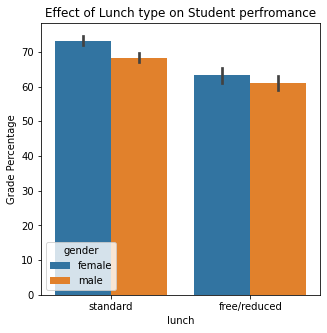

In [ ]:
#this checks the effect of lunch on the performance of students.

plt.figure(figsize=(5,5))
plt.title('Effect of Lunch type on Student perfromance')
sns.barplot(hue=S_P['gender'],x=S_P['lunch'],y=S_P['Grade Percentage'])
plt.show()

OBSERVATION
From the plot above, students on standard lunch have better overall scores than those who take free/reduced lunch. But it doesnt give a deeper perspective on the performance of students.

Next we look at the effect of the level of test preparation on the student performance.

In [ ]:
#checking the no of students that completed test prep and those that didnt.

S_P['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

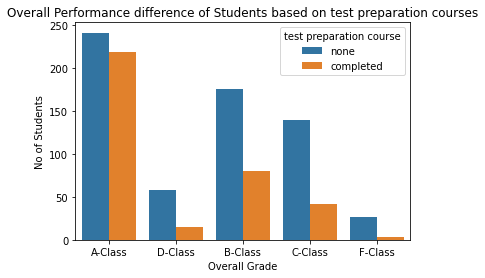

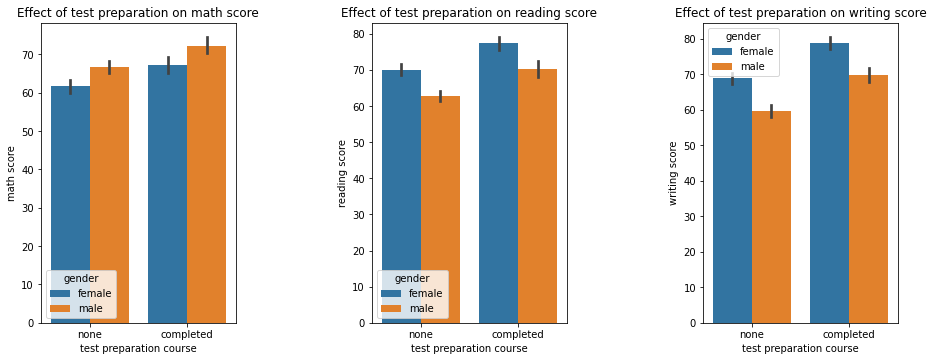

In [ ]:
#plot to check the effect of level of test preparation of courses 
sns.countplot(S_P['Overall Grade'],hue = S_P['test preparation course'])
plt.ylabel('No of Students')
plt.title('Overall Performance difference of Students based on test preparation courses')

plt.figure(figsize=(20,10))
plt.subplots_adjust(left=0.145, bottom=0.2, right=1.2, top=1.2,
                      wspace=0.7, hspace=0.4)

plt.subplot(251)
plt.title('Effect of test preparation on math score')
sns.barplot(hue= 'gender',x='test preparation course', y='math score', data=S_P)
plt.subplot(252)
plt.title('Effect of test preparation on reading score')
sns.barplot(hue='gender',x='test preparation course', y='reading score', data=S_P)
plt.subplot(253)
plt.title('Effect of test preparation on writing score')
sns.barplot(hue= 'gender',x='test preparation course', y= 'writing score', data=S_P)
plt.show()



OBSERVATION:
The test preparation has a significant effect on the performance of the students. Majority of the students in A-Class completed their test preparation course, while those with grades F had very little number of those that completed the course. Although from the data we can see that the number of students that did not complete the course is higher in all score grade level than those who actually did. We can assume that the cost of taking the test preparation course might have been high or the students were not encouraged to complete the courses by their parents.

Also observed is that more male than female completed the test preparation for maths, which might have lead to th higher score in maths for males. The females also completed the test preparation course both in reading and writing than their male counterpart.

## Conclusion
The categorical variables gender and test preparation courses have a higher correlation with the resulting scores of the students. Also the female gender tend to do better than their male counterpart in reading, while the male have higher grade points in math than the females.